Q3. Predict Loan Approval using Income, Education & Credit History

Train the model,

Print accuracy,

Print precision, recall, F1-score for both classes,

Predict on the small example test set,

Show the predictions labeled clearly.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load training data with Loan_Status
df = pd.read_csv("synthetic_loan_data.csv")  # Replace with your actual file path

# Drop rows with missing values in required columns
df = df.dropna(subset=['ApplicantIncome', 'Education', 'Credit_History', 'Loan_Status'])

# Encode categorical columns
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])  # Graduate=0, Not Graduate=1

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Encode target

# Prepare features and target
X = df[['ApplicantIncome', 'Education', 'Credit_History']]
y = df['Loan_Status']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict loan approval on test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Model accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# --- Create example test data for new predictions ---
test_data = pd.DataFrame({
    'ApplicantIncome': [5000, 3000, 4000],
    'Education': le_edu.transform(['Graduate', 'Not Graduate', 'Graduate']),
    'Credit_History': [1.0, 0.0, 1.0]
})

# Predict loan approval on new test data
test_data['Predicted_Loan_Status'] = ['Approved' if p == 1 else 'Rejected' for p in model.predict(test_data)]

print("\nTest data predictions:")
print(test_data)


Model accuracy on test set: 0.94

Classification Report:
               precision    recall  f1-score   support

    Rejected       0.98      0.77      0.87        75
    Approved       0.93      1.00      0.96       225

    accuracy                           0.94       300
   macro avg       0.96      0.88      0.91       300
weighted avg       0.94      0.94      0.94       300


Test data predictions:
   ApplicantIncome  Education  Credit_History Predicted_Loan_Status
0             5000          0             1.0              Approved
1             3000          1             0.0              Rejected
2             4000          0             1.0              Approved


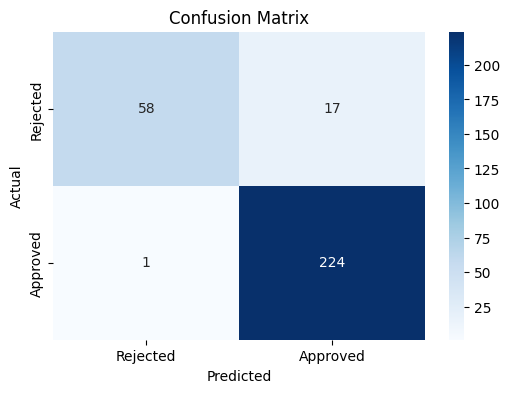

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_14696\3355172944.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_data, x='Predicted_Loan_Status', palette='pastel')


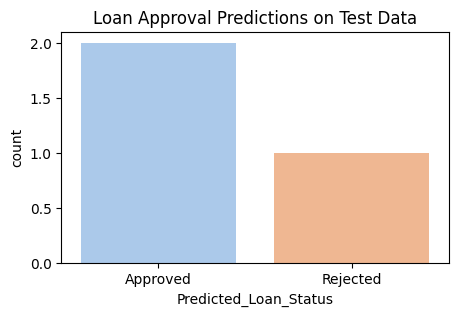

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix plot ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- Bar plot for example test data predictions ---
plt.figure(figsize=(5,3))
sns.countplot(data=test_data, x='Predicted_Loan_Status', palette='pastel')
plt.title('Loan Approval Predictions on Test Data')
plt.show()
